# DataSet Preparation Utils
by Wael Radwan

### Library used to process audio files

continans various tools to prepare the training dataset and testing dataset

mainly used to randomize files of the dataset divide the dataset into traininig and testing dataset randomize the test files

the main idea here is to load the dataset into classified directories then use this utility to create train/test dataset with the randomization



##### first import

In [1]:
%matplotlib inline

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from PIL import Image
import os.path
import scipy.misc
import imageio


### Plot the time series.

In [2]:
# Plot the time series.
def plt_time_series(y):
    plt.figure(figsize=(10, 4))
    plt.title('Time series')
    t = [float(i)/sr for i, _ in enumerate(y)]
    plt.plot(t, y)
    plt.tight_layout()

#### Plot the fft from scipy.

In [3]:
# Plot the fft from scipy.
def plt_fft(y):
    yf = scipy.fftpack.fft(y)
    N = len(yf)
    xf = np.linspace(0.0, duration, N/2)
    plt.figure(figsize=(10, 4))
    plt.title('FFT')
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.tight_layout()
    D = np.abs(librosa.stft(y, n_fft=1024, hop_length=512, center=False))**2

#### Show regular spectrogram.

In [4]:
# Show regular spectrogram.
def plt_req_spectorgram(y):
    plt.figure(figsize=(10, 4))
    D = np.abs(librosa.stft(y, n_fft=1024, hop_length=512, center=False))**2
    librosa.display.specshow(librosa.power_to_db(D, ref=np.max),
                             y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('FFT spectrogram')
    plt.tight_layout()

#### Show Mel spectrogram.

In [5]:
# Show Mel spectrogram.
def plt_Mel_spectorgram(y):
    D = np.abs(librosa.stft(y, n_fft=1024, hop_length=512, center=False))**2
    S = librosa.feature.melspectrogram(S=D, n_mels=20)
    
    plt.figure(figsize=(20, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                             y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    

#### Show MFCC spectrogram.

In [6]:
# Show MFCC spectrogram.
def plt_MFCC_spectorgram(y):
    D = np.abs(librosa.stft(y, n_fft=1024, hop_length=512, center=False))**2
    S = librosa.feature.melspectrogram(S=D, n_mels=20)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S))
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()

#### Save the spectrogram as an image.

In [7]:
# Save the spectrogram as an image.
def save_spec_img(y,filename):
    D = np.abs(librosa.stft(y, n_fft=1024, hop_length=512, center=False))**2
    S = librosa.feature.melspectrogram(S=D, n_mels=20)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S)) 
    imageio.imwrite(filename, mfccs)

In [8]:
def createSlicesFromSpectrograms(desiredSize):
    for filename in os.listdir(spectrogramsPath):
        if filename.endswith(".png"):
            sliceSpectrogram(filename,desiredSize)

#### test area

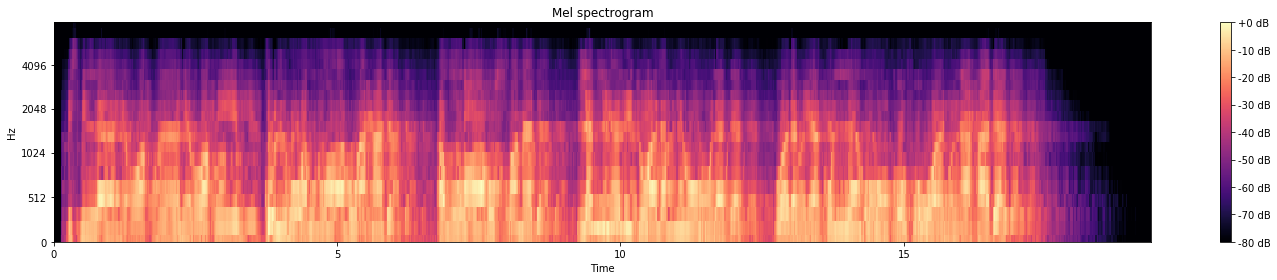

In [9]:
test_aud_file='/ds/dataset/quran/999/999_0001.mp3'
test_spec_file='999_0001.png'
y, sr = librosa.load(test_aud_file)
duration = len(y) / sr
plt_Mel_spectorgram(y)
save_spec_img(y,test_spec_file)

Populating the interactive namespace from numpy and matplotlib


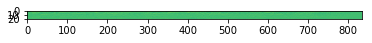

In [10]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(test_spec_file)
imgplot = plt.imshow(img)
plt.show()

In [56]:
y.shape

(427968,)

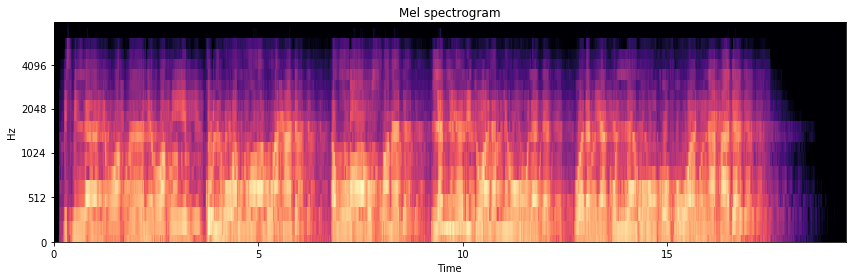

In [10]:
test_aud_file='/ds/dataset/quran/999/999_0005.mp3'
test_spec_file='999_0001.png'
D = np.abs(librosa.stft(y, n_fft=1024, hop_length=512, center=False))**2
S = librosa.feature.melspectrogram(S=D, n_mels=20)

plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')
#plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [11]:
def plot_specgram(raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 2: Spectrogram',x=0.5, y=0.915,fontsize=18)
    plt.show()

In [12]:
plt.subplot(10,1,i)
specgram(np.array(raw_sounds), Fs=22050)
plt.title(n.title())

NameError: name 'i' is not defined

In [57]:
D = np.abs(librosa.stft(y, n_fft=1024, hop_length=512, center=False))**2
S = librosa.feature.melspectrogram(S=D, n_mels=20)

In [59]:
S.shape

(20, 834)

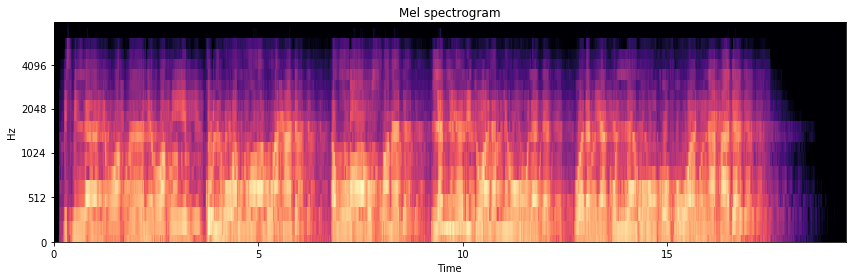

In [62]:
test_aud_file='/ds/dataset/quran/999/999_0001.mp3'
y, sr = librosa.load(test_aud_file)
D1 = np.abs(librosa.stft(y, n_fft=1024, hop_length=512, center=False))**2
S1 = librosa.feature.melspectrogram(S=D1, n_mels=20)

plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(S1, ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')
#plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

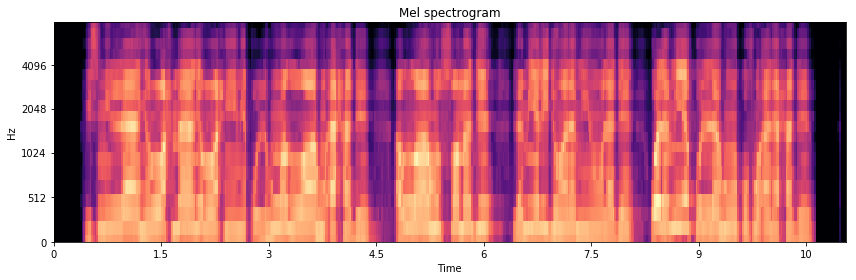

In [64]:
test_aud_file='/ds/dataset/quran/999/999_0002.mp3'
y, sr = librosa.load(test_aud_file)
D2 = np.abs(librosa.stft(y, n_fft=1024, hop_length=512, center=False))**2
S2 = librosa.feature.melspectrogram(S=D2, n_mels=20)

plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(S2, ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')
#plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [65]:
S1.shape

(20, 834)

In [66]:
S2.shape

(20, 476)

In [74]:
max(S2[0])

7.0249379872803823

In [81]:
X=librosa.util.frame(y, frame_length=2048, hop_length=512)

In [82]:
X.shape

(2048, 474)

In [78]:
y.shape

(244224,)

In [85]:
min(X[0])

-0.37677535

In [86]:
S2 = librosa.feature.melspectrogram(S=X, n_mels=20)

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   8.53874318e-07,
         8.02625923e-06,   6.63349876e-05,  -2.51391727e-03,
         1.46069742e-03,  -4.35856132e-03,   5.13702763e-03,
        -2.57216019e-04,   1.63074964e-03,   1.61123042e-04,
         3.26410539e-04,   7.84301134e-03,  -5.28272057e-03,
        -1.14464132e-02,  -1.30505377e-02,  -2.38581249e-03,
         9.01765690e-03,   1.14202953e-02,   3.17936315e-03,
        -8.62519405e-03,  -5.70850691e-03,   7.79424045e-03,
         8.85319609e-03,  -5.85122675e-03,  -8.42486517e-03,
        -3.46468642e-03,   7.00722244e-03,   3.97636860e-03,
         2.66560423e-03,  -6.25932914e-03,  -4.92101369e-03,
         7.27261847e-03,

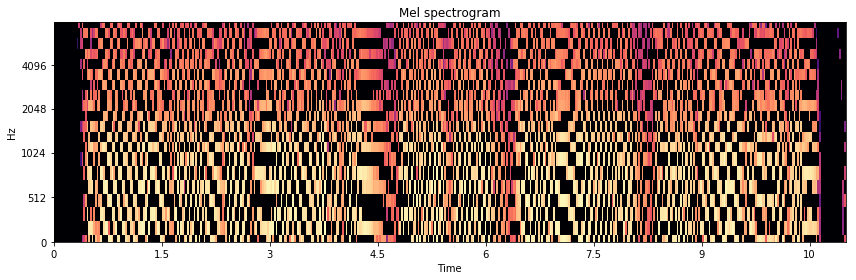

In [90]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(S2, ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')
#plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()